In [1]:
import matplotlib.pyplot as plt
import cv2
import os

from process_datasets.augmentation.augmentation import stretch, distort, perspective
from doctr.io import DocumentFile
from doctr.models import detection_predictor
import numpy as np
from copy import deepcopy
import pandas as pd

/Users/anastasiabogatenkova/miniconda3/envs/doc/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


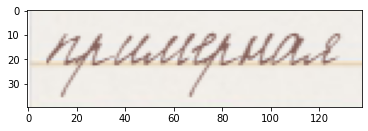

In [116]:
img_name = "datasets/rus_out/img/rustesttest431.png"
im = cv2.imread(img_name)
plt.imshow(im)

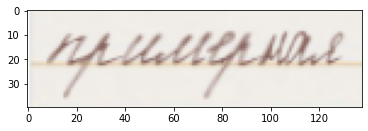

In [117]:
plt.imshow(stretch(stretch(im, 2), 2))

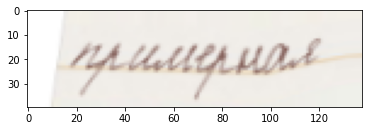

In [118]:
plt.imshow(distort(distort(im, 4), 4))

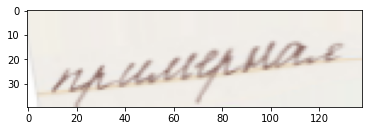

In [119]:
plt.imshow(perspective(perspective(im)))

In [ ]:
data_dir = "data/lines_detection"
file_name = "{i}.png"

In [120]:
doc_name = os.path.join(data_dir, file_name.format(i=3))
single_img_doc = DocumentFile.from_images(doc_name)
model = detection_predictor(arch='db_resnet50', pretrained=True).eval()
out = model(single_img_doc)
img = cv2.imread(doc_name)
h, w, _ = img.shape
bboxes = [(int(box[0] * w), int(box[1] * h), int(box[2] * w), int(box[3] * h)) for box in out[0]]

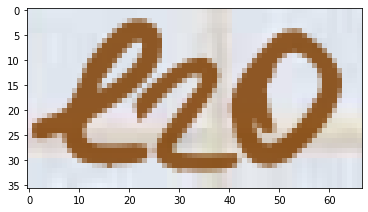

In [121]:
bbox = bboxes[10]
x1, y1, x2, y2 = bbox
cropped_img = deepcopy(img[y1:y2, x1:x2])
plt.imshow(cropped_img)

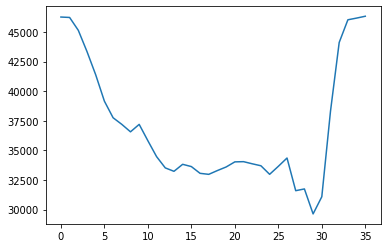

In [122]:
cr_pr = cropped_img.sum(axis=1).sum(axis=1)
plt.plot(cr_pr)

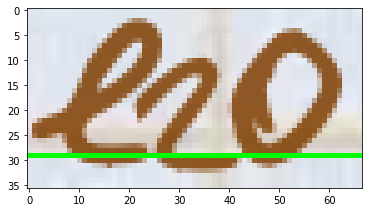

In [123]:
shift = np.argmin(cr_pr)
y1, y2, y1+np.argmin(cr_pr)
im = cv2.line(cropped_img, (0, shift), (cropped_img.shape[1], shift), color=(0, 255, 0))
plt.imshow(im)

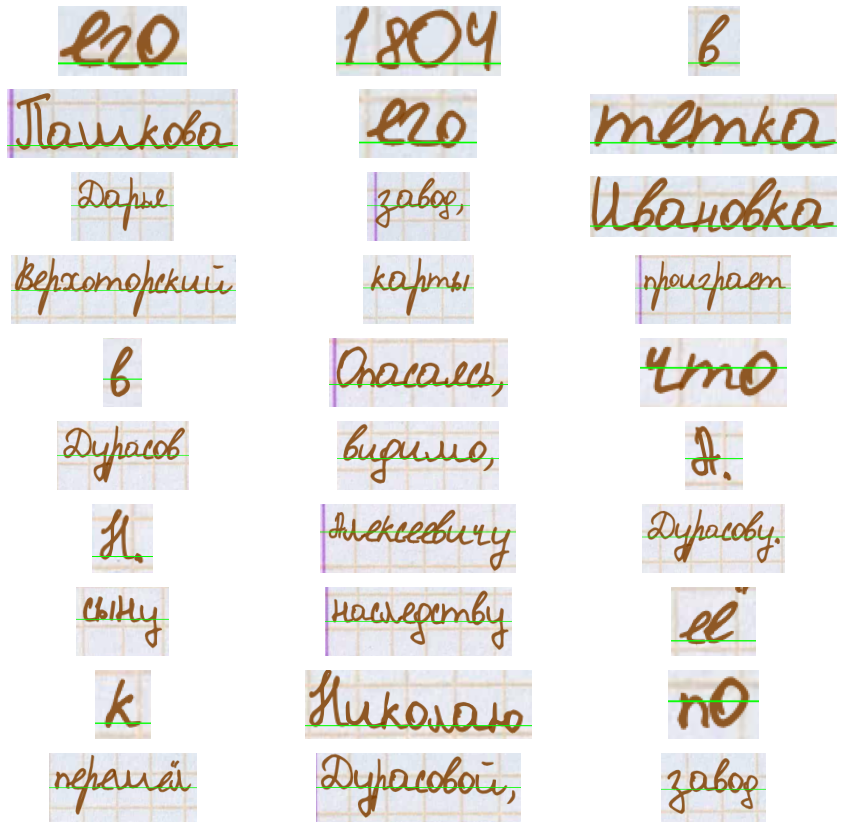

In [125]:
axes_x = 3
axes_y = min(len(bboxes) // 3, 10)
len_axes = axes_x * axes_y
fig, axes = plt.subplots(axes_y, axes_x)
fig.set_figheight(15)
fig.set_figwidth(15)

for i, bbox in enumerate(bboxes[10:]):
    if i >= len_axes:
        break
    x1, y1, x2, y2 = bbox
    im = deepcopy(img[y1:y2, x1:x2])
    cr_pr = im.sum(axis=1).sum(axis=1)
    shift = np.argmin(cr_pr)
    im = cv2.line(im, (0, shift), (im.shape[1], shift), color=(0, 255, 0))
    # axes[i//3,i%3].set_title(f"predicted: {word}")
    axes[i//3,i%3].imshow(im)
    axes[i//3,i%3].axis('off')

In [164]:
img = cv2.imread(os.path.join(data_dir, file_name.format(i=1)))
single_img_doc = DocumentFile.from_images(os.path.join(data_dir, file_name.format(i=1)))
out = model(single_img_doc)
h, w, _ = img.shape
bboxes = [(int(box[0] * w), int(box[1] * h), int(box[2] * w), int(box[3] * h)) for box in out[0]]



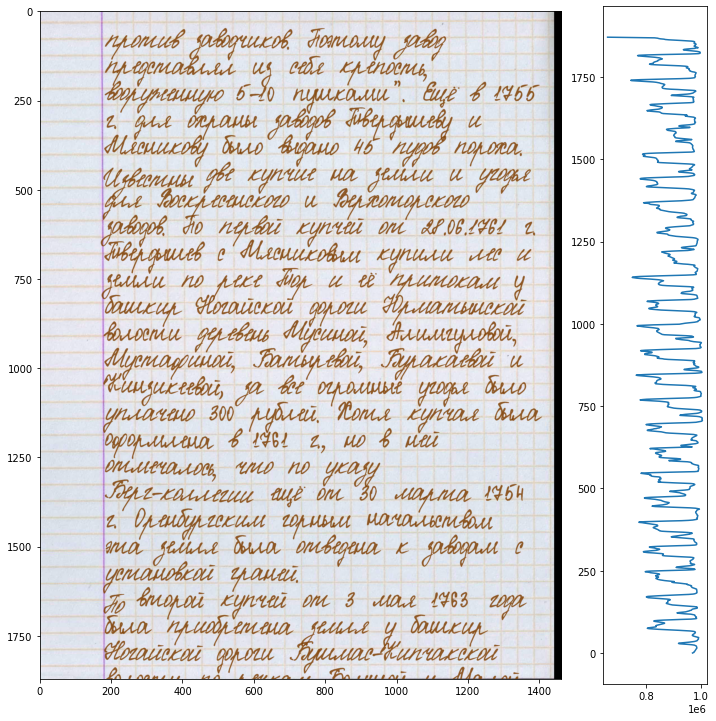

In [165]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]})
fig.set_figheight(10)
fig.set_figwidth(10)
fig.tight_layout()

ax[0].imshow(img)
projection = img.sum(axis=1).sum(axis=1)
ax[1].plot(projection,range(len(projection)))

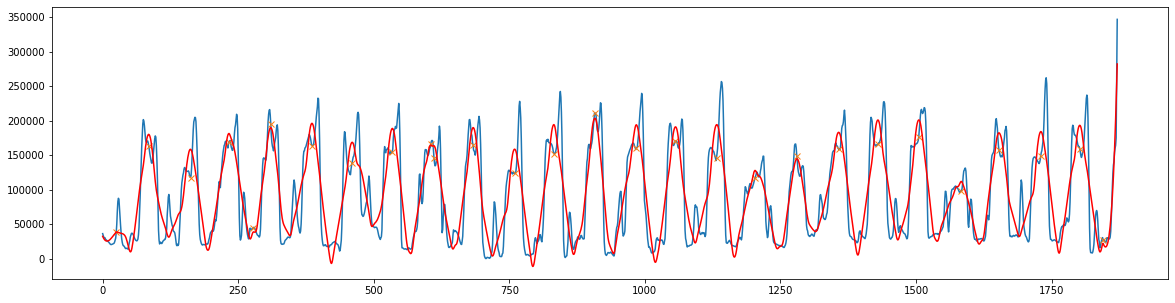

In [166]:
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

x = np.max(projection) - projection
xhat = savgol_filter(x, 51, 3)
peaks, _ = find_peaks(xhat, height=0)
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(xhat, color='red')
plt.show()

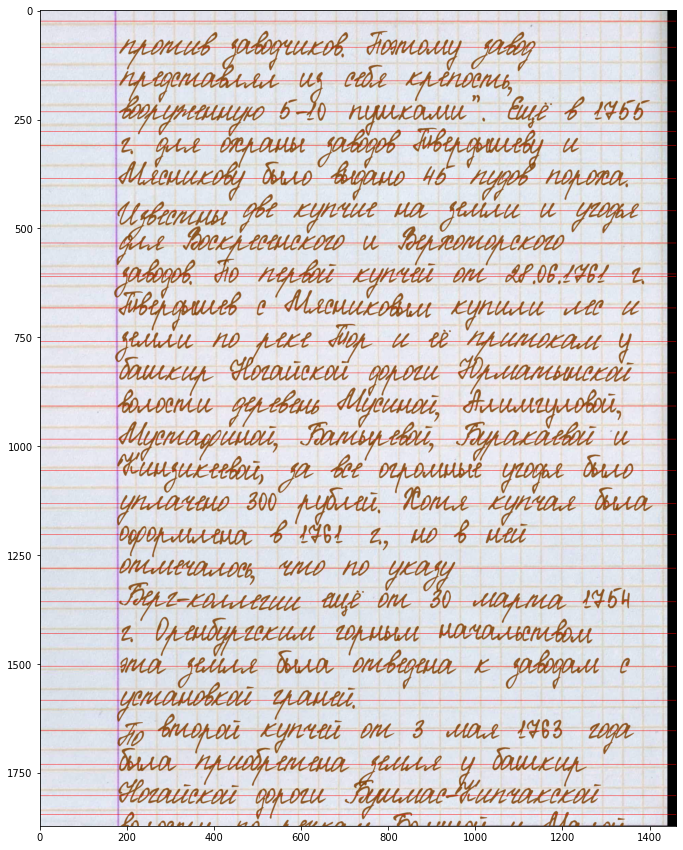

In [167]:
img_with_lines = deepcopy(img)

for idx in peaks:
    cv2.line(img_with_lines, (0, idx), (img_with_lines.shape[1], idx), (255, 0, 0))

plt.figure(figsize=(15, 15))
plt.imshow(img_with_lines)

In [57]:
img = cv2.imread("data/img.png")
pr = img.sum(axis=1).sum(axis=1)
pr = np.max(pr) - pr

In [58]:
y_list = []
y_start = 0

for i, s in enumerate(pr):
    if s != 0:
        continue
    if s == 0 and i > 0 and pr[i - 1] != 0:
        y_start = i
        continue
    if s == 0 and i < len(pr) - 1 and pr[i + 1] != 0 and i - y_start > 10:
        y_list.append((i + y_start) // 2)

y_list.append(len(pr) - 1)

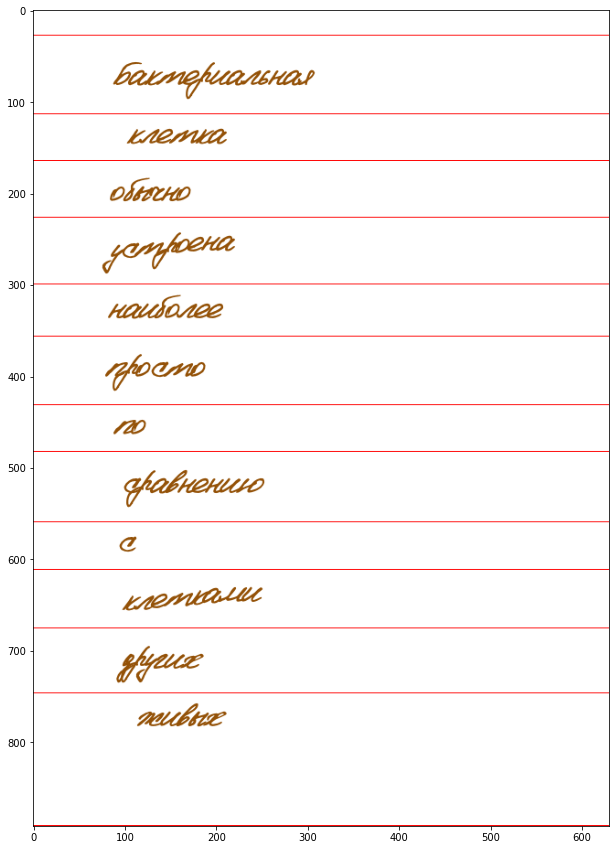

In [59]:
img_with_lines = deepcopy(img)
for y in y_list:
    cv2.line(img_with_lines, (0, y), (img_with_lines.shape[1], y), (255, 0, 0))

plt.figure(figsize=(15, 15))
plt.imshow(img_with_lines)

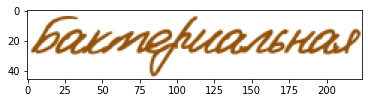

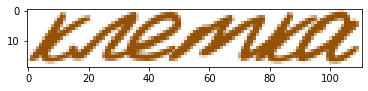

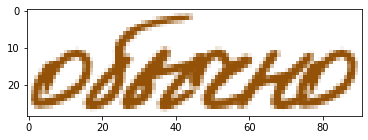

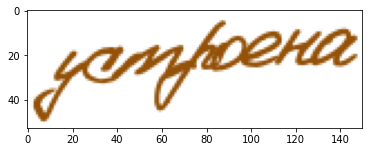

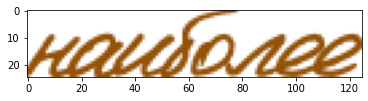

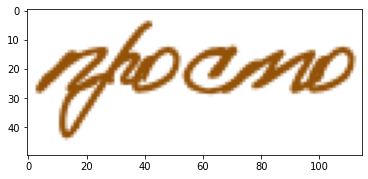

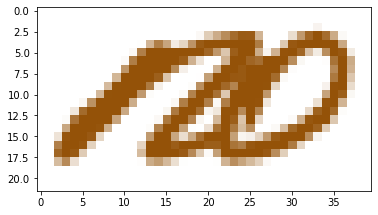

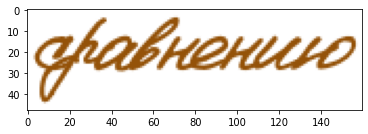

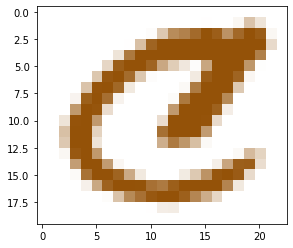

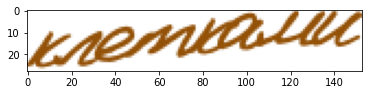

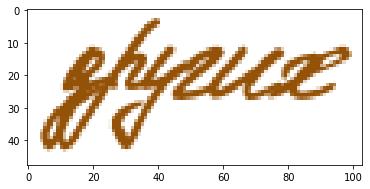

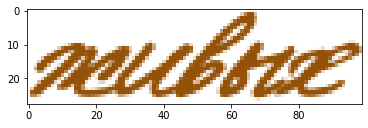

In [60]:
model = detection_predictor(arch='db_resnet50', pretrained=True).eval()

img_copy = deepcopy(img)
out = model([img_copy])

h, w, _ = img_copy.shape
bboxes = [(int(box[0] * w), int(box[1] * h), int(box[2] * w), int(box[3] * h)) for box in out[0]]
bboxes = sorted(bboxes, key=lambda x: x[1])
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    plt.figure()
    plt.imshow(img_copy[y1:y2, x1:x2])

In [64]:
dataset_dir = os.path.join("datasets", "synthetic")

def show_results(gt_df: pd.DataFrame, n: int = 21):
    df_sample = gt_df.sample(n=n)
    axes_x = 3
    axes_y = min(n // 3, 10)
    len_axes = axes_x * axes_y
    fig, axes = plt.subplots(axes_y, axes_x)
    fig.set_figheight(20)
    fig.set_figwidth(15)

    for i, (ind, row) in enumerate(df_sample.iterrows()):
        if i >= len_axes:
            break
        word = row["word"]
        img_name = os.path.join(dataset_dir, "cropped" + row["path"][3:])
        im = cv2.imread(img_name)
        axes[i//3,i%3].set_title(f"predicted: {word}")
        axes[i//3,i%3].imshow(im)
        axes[i//3,i%3].axis('off')

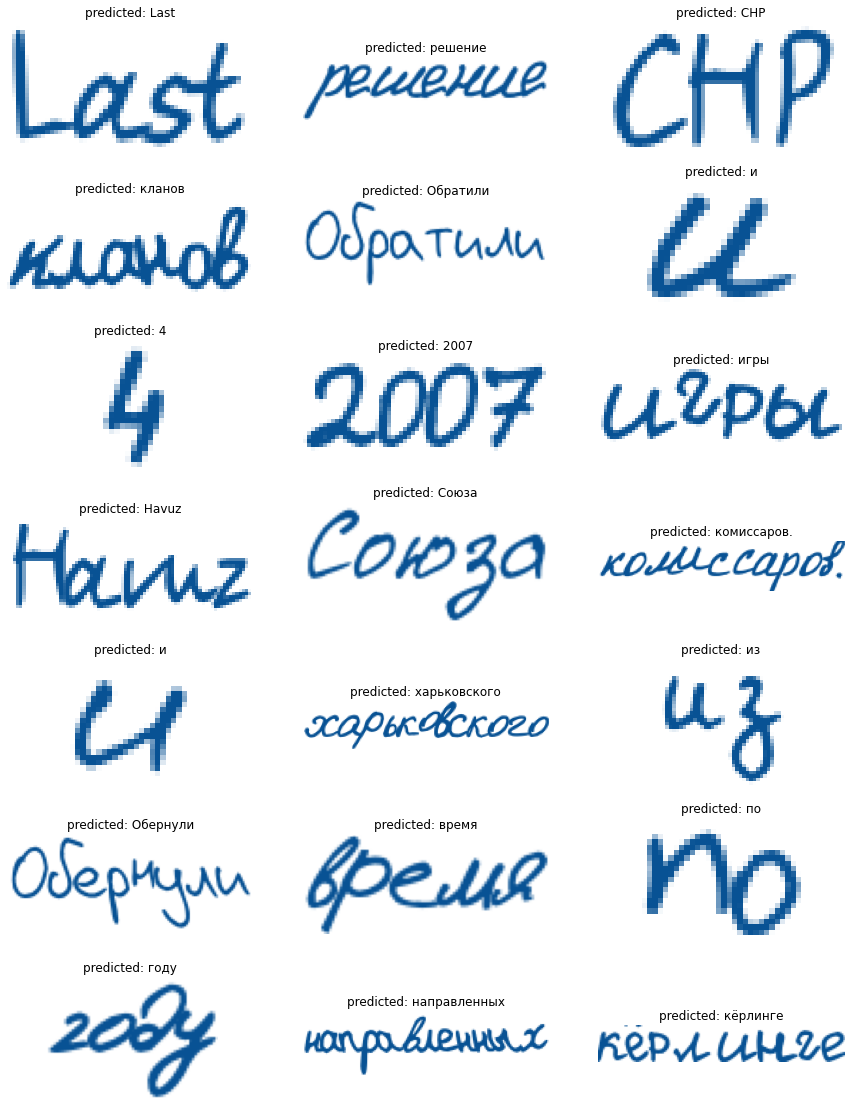

In [32]:
df = pd.read_csv(os.path.join(dataset_dir, f"gt1.txt"), sep="\t", names=["path", "word"])
show_results(df)

In [2]:
dataset_dir = os.path.join("datasets", "synthetic")
df = pd.read_csv(os.path.join(dataset_dir, f"gt.txt"), sep="\t", names=["path", "word"])
merged_df = pd.read_csv(os.path.join(dataset_dir, f"merged_gt.txt"), sep="\t", names=["path", "word"])
df.head()

,path,word
0,img/handwrittner.com-166jnw6u_9_0_0.png,Чапаев
1,img/handwrittner.com-166jnw6u_9_0_1.png,и
2,img/handwrittner.com-166jnw6u_9_0_2.png,Пустота
3,img/handwrittner.com-166jnw6u_9_0_3.png,третий
4,img/handwrittner.com-166jnw6u_9_0_4.png,роман


In [3]:
df.shape, merged_df.shape

((15895, 2), (17942, 2))

In [4]:
merged_df = pd.concat([df, merged_df], ignore_index=True)
merged_df.to_csv(os.path.join(dataset_dir, "merged_gt.txt"), sep="\t", index=False, header=False)
merged_df.shape

(33837, 2)